<a href="https://colab.research.google.com/github/cuongle2002/BTVNW5-FUZZYLOGIC-/blob/main/Fuzzy_logic%E2%80%93based_clinical_decision_support_system_for_the_evaluation_of_renal_function_in_post%E2%80%90Transplant_Patientsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ee8f27f13d0c48af04bdcb68f368a6f586130e8f7ce7a72c86c6a9eeb32d927a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


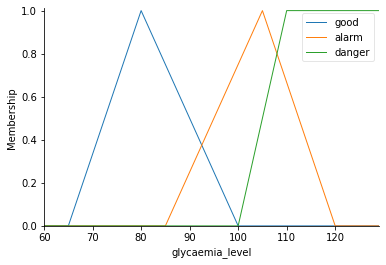

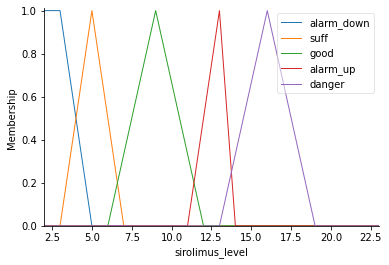

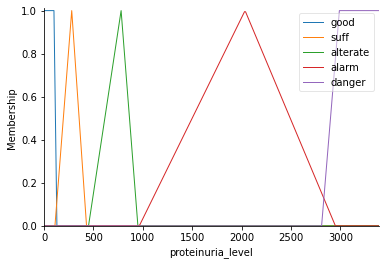

In [2]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

glycaemia_level = ctrl.Antecedent(np.arange(60, 130, 1), 'glycaemia_level')
sirolimus_level = ctrl.Antecedent(np.arange(2, 24, 1), 'sirolimus_level')
proteinuria_level = ctrl.Consequent(np.arange(0,3400,10), 'proteinuria_level')

glycaemia_level['good']= fuzz.trimf(glycaemia_level.universe,[65,80,100])
glycaemia_level['alarm']= fuzz.trimf(glycaemia_level.universe,[85,105,120])
glycaemia_level['danger']= fuzz.trapmf(glycaemia_level.universe,[100,110,135,135])


sirolimus_level['alarm_down']= fuzz.trapmf(sirolimus_level.universe,[0,0,3,5])
sirolimus_level['suff']= fuzz.trimf(sirolimus_level.universe,[3,5,7])
sirolimus_level['good']= fuzz.trimf(sirolimus_level.universe,[6,9,12])
sirolimus_level['alarm_up']= fuzz.trimf(sirolimus_level.universe,[11,13,14])
sirolimus_level['danger']= fuzz.trimf(sirolimus_level.universe,[13,16,19])


proteinuria_level['good']= fuzz.trapmf(proteinuria_level.universe,[0,0,100,130])
proteinuria_level['suff']= fuzz.trimf(proteinuria_level.universe,[110,280,430])
proteinuria_level['alterate']= fuzz.trimf(proteinuria_level.universe,[450,780,950])
proteinuria_level['alarm']= fuzz.trimf(proteinuria_level.universe,[964,2035,2950])
proteinuria_level['danger']= fuzz.trapmf(proteinuria_level.universe,[2810,2990,3400,3400])

glycaemia_level.view()
sirolimus_level.view()
proteinuria_level.view()




272.7777777777777


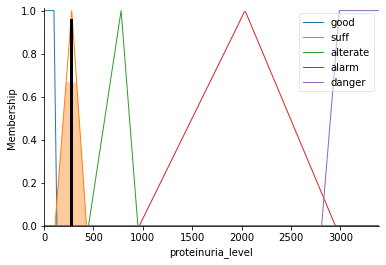

In [3]:
rule1 = ctrl.Rule(glycaemia_level['good'] & sirolimus_level['good'],proteinuria_level['good'])
rule2 = ctrl.Rule(glycaemia_level['danger'] & sirolimus_level['danger'],proteinuria_level['danger'])
rule3 = ctrl.Rule(glycaemia_level['good'] & sirolimus_level['suff'],proteinuria_level['suff'])
rule4 = ctrl.Rule(glycaemia_level['alarm'] & sirolimus_level['alarm_up'],proteinuria_level['alarm'])
rule5 = ctrl.Rule(glycaemia_level['alarm'] & sirolimus_level['suff'],proteinuria_level['alterate'])
rule6 = ctrl.Rule(glycaemia_level['good'] & sirolimus_level['alarm_up'],proteinuria_level['alterate'])
rule7 = ctrl.Rule(glycaemia_level['alarm'] & sirolimus_level['good'],proteinuria_level['suff'])
rule8 = ctrl.Rule(glycaemia_level['good'] & sirolimus_level['alarm_down'],proteinuria_level['suff'])

proteinuriaring_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
proteinuriaring= ctrl.ControlSystemSimulation(proteinuriaring_ctrl)
proteinuriaring.input['glycaemia_level']=100
proteinuriaring.input['sirolimus_level']=10
proteinuriaring.compute()
print(proteinuriaring.output['proteinuria_level'])
proteinuria_level.view(sim=proteinuriaring)
     